In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

# Functions

In [2]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [3]:
def mutant(x, t):
    imdot = (betaM*x[0]+betaM1*x[1])*Seq - (beta1*I1eq+beta1M*x[1])*x[0] - (mu+alphaM)*x[0]
    d1mdot = (beta1*I1eq+beta1M*x[1])*x[0] + (betaM*x[0]+betaM1*x[1])*I1eq - (mu+alpha1M)*x[1]
    return imdot, d1mdot

# Parameter Values

In [4]:
rho = 0.02                           # host input function
mu = 0.02                            # basline mortality rate
sigmaS = 1                           # vulnerability of suscpetible hosts to infection
sigmaI = 5                           # vulnerability of infected hosts to infection
alpha1 = 0.03                        # virulence of a host infected by 1
beta1 = 0.4                          # transmission rate of strain 1 in single infection

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

betaM = 0.5                          # transmission rate of mutant in single infection
betaM1 = 0.6                         # transmission rate of mutant strain in a host co-infected by M&1
beta1M = 0.6                         # transmission rate of strain 1 in a host co-infected by 1&M
alphaM = 0.09                        # virulence of host infected by mutant
alpha1M = 0.12                       # virulence of host coinfected by 1&M

# -------------------------------------------------------------------------------------------------------------

In [5]:
#rho_values = np.arange(start=0, stop=0.12, step=0.02)
#mu_values = np.arange(start=0, stop=0.12, step=0.02)
#sigmaS_values = np.arange(start=0, stop=12, step=2)
#sigmaI_values = np.arange(start=0, stop=12, step=2)
#alpha1_values = np.arange(start=0, stop=0.12, step=0.02)
#beta1_values = np.arange(start=0, stop=1.2, step=0.2)

# $\beta_1$

In [6]:
beta1_values = np.arange(start=0, stop=1.2, step=0.2)

In [7]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

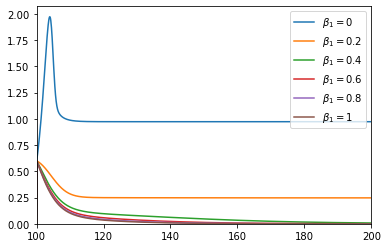

In [8]:
for i in range(6):
    beta1 = beta1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\beta_1=0$',r'$\beta_1=0.2$',r'$\beta_1=0.4$',r'$\beta_1=0.6$',r'$\beta_1=0.8$',r'$\beta_1=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

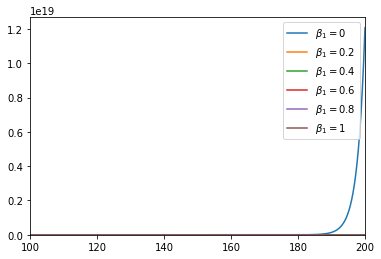

In [9]:
for i in range(6):
    beta1 = beta1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\beta_1=0$',r'$\beta_1=0.2$',r'$\beta_1=0.4$',r'$\beta_1=0.6$',r'$\beta_1=0.8$',r'$\beta_1=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\alpha_1$

In [10]:
alpha1_values = np.arange(start=0, stop=0.12, step=0.02)

In [11]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

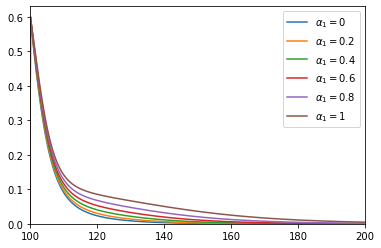

In [12]:
for i in range(6):
    alpha1 = alpha1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\alpha_1=0$',r'$\alpha_1=0.2$',r'$\alpha_1=0.4$',r'$\alpha_1=0.6$',r'$\alpha_1=0.8$',r'$\alpha_1=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

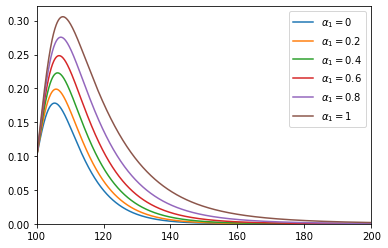

In [13]:
for i in range(6):    
    alpha1 = alpha1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\alpha_1=0$',r'$\alpha_1=0.2$',r'$\alpha_1=0.4$',r'$\alpha_1=0.6$',r'$\alpha_1=0.8$',r'$\alpha_1=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\sigma_S$

In [14]:
sigmaS_values = np.arange(start=0, stop=12, step=2)

In [15]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

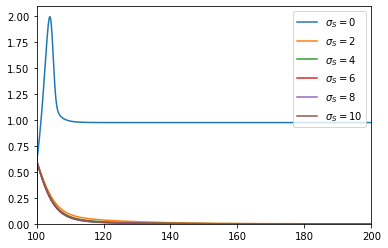

In [16]:
for i in range(6):
    sigmaS = sigmaS_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)
    
plt.legend([r'$\sigma_S=0$',r'$\sigma_S=2$',r'$\sigma_S=4$',r'$\sigma_S=6$',r'$\sigma_S=8$',r'$\sigma_S=10$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

(0.0, 1.0334878325084494e+19)

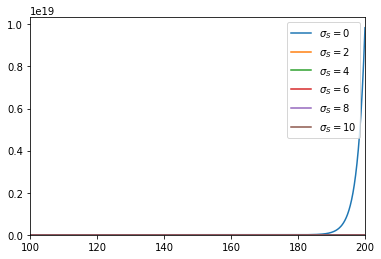

In [17]:
for i in range(6):
    sigmaS = sigmaS_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)
    
plt.legend([r'$\sigma_S=0$',r'$\sigma_S=2$',r'$\sigma_S=4$',r'$\sigma_S=6$',r'$\sigma_S=8$',r'$\sigma_S=10$'],loc='upper right')
plt.xlim(100,200)
plt.ylim(0)

# $\sigma_I$

In [18]:
sigmaI_values = np.arange(start=0, stop=12, step=2)

In [19]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

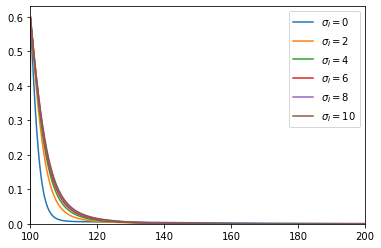

In [20]:
for i in range(6):
    sigmaI = sigmaI_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\sigma_I=0$',r'$\sigma_I=2$',r'$\sigma_I=4$',r'$\sigma_I=6$',r'$\sigma_I=8$',r'$\sigma_I=10$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

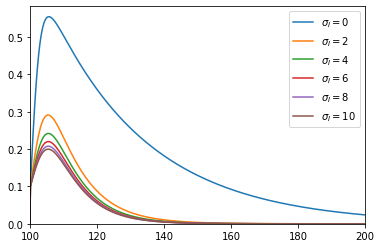

In [21]:
for i in range(6):
    sigmaI = sigmaI_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\sigma_I=0$',r'$\sigma_I=2$',r'$\sigma_I=4$',r'$\sigma_I=6$',r'$\sigma_I=8$',r'$\sigma_I=10$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\mu$

In [22]:
mu_values = np.arange(start=0, stop=0.12, step=0.02)

In [23]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

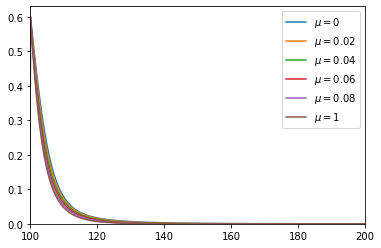

In [24]:
for i in range(6):
    mu = mu_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\mu=0$',r'$\mu=0.02$',r'$\mu=0.04$',r'$\mu=0.06$',r'$\mu=0.08$',r'$\mu=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

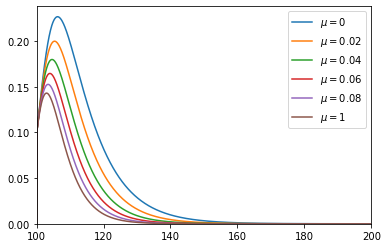

In [25]:
for i in range(6):
    mu = mu_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\mu=0$',r'$\mu=0.02$',r'$\mu=0.04$',r'$\mu=0.06$',r'$\mu=0.08$',r'$\mu=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\rho$

In [26]:
rho_values = np.arange(start=0, stop=0.12, step=0.02)

In [27]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

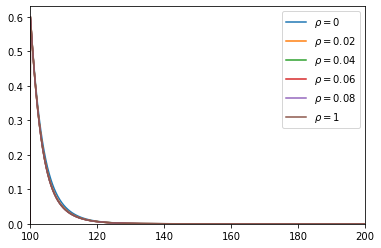

In [28]:
for i in range(6):
    rho = rho_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\rho=0$',r'$\rho=0.02$',r'$\rho=0.04$',r'$\rho=0.06$',r'$\rho=0.08$',r'$\rho=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

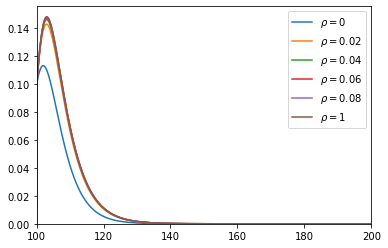

In [29]:
for i in range(6):
    rho = rho_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\rho=0$',r'$\rho=0.02$',r'$\rho=0.04$',r'$\rho=0.06$',r'$\rho=0.08$',r'$\rho=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\beta_m$

In [34]:
betam_values = np.arange(start=0, stop=1.2, step=0.02)

In [35]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

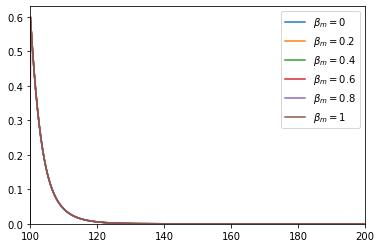

In [36]:
for i in range(6):
    betaM = betam_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\beta_m=0$',r'$\beta_m=0.2$',r'$\beta_m=0.4$',r'$\beta_m=0.6$',r'$\beta_m=0.8$',r'$\beta_m=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

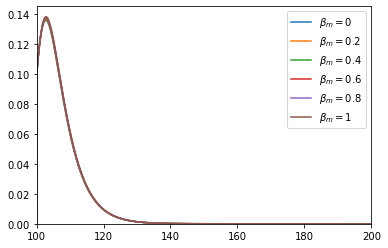

In [37]:
for i in range(6):
    betaM = betam_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\beta_m=0$',r'$\beta_m=0.2$',r'$\beta_m=0.4$',r'$\beta_m=0.6$',r'$\beta_m=0.8$',r'$\beta_m=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\beta_{m1}$ = $\beta_{1m}$

In [38]:
beta1m_values = np.arange(start=0, stop=1.2, step=0.02)
betam1_values = np.arange(start=0, stop=1.2, step=0.02)

In [39]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

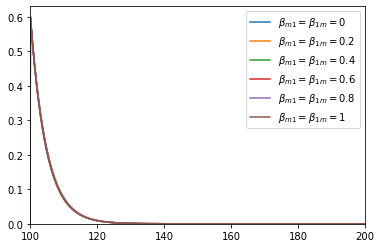

In [40]:
for i in range(6):
    betaM1 = betam1_values[i]
    beta1M = betam1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\beta_{m1}=\beta_{1m}=0$',r'$\beta_{m1}=\beta_{1m}=0.2$',r'$\beta_{m1}=\beta_{1m}=0.4$',r'$\beta_{m1}=\beta_{1m}=0.6$',r'$\beta_{m1}=\beta_{1m}=0.8$',r'$\beta_{m1}=\beta_{1m}=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

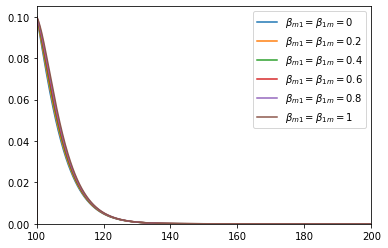

In [41]:
for i in range(6):
    betaM1 = betam1_values[i]
    beta1M = betam1_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\beta_{m1}=\beta_{1m}=0$',r'$\beta_{m1}=\beta_{1m}=0.2$',r'$\beta_{m1}=\beta_{1m}=0.4$',r'$\beta_{m1}=\beta_{1m}=0.6$',r'$\beta_{m1}=\beta_{1m}=0.8$',r'$\beta_{m1}=\beta_{1m}=1$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\alpha_m$

In [45]:
alpham_values = np.arange(start=0, stop=0.18, step=0.03)

In [46]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

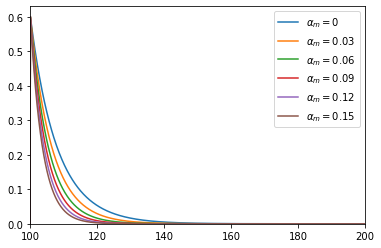

In [47]:
for i in range(6):
    alphaM = alpham_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\alpha_m=0$',r'$\alpha_m=0.03$',r'$\alpha_m=0.06$',r'$\alpha_m=0.09$',r'$\alpha_m=0.12$',r'$\alpha_m=0.15$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

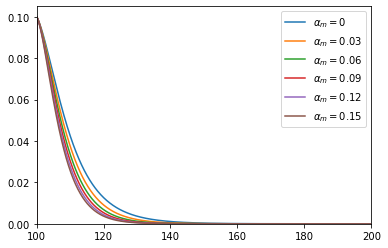

In [48]:
for i in range(6):
    alphaM = alpham_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\alpha_m=0$',r'$\alpha_m=0.03$',r'$\alpha_m=0.06$',r'$\alpha_m=0.09$',r'$\alpha_m=0.12$',r'$\alpha_m=0.15$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

# $\alpha_{1m}$

In [49]:
alpha1m_values = np.arange(start=0, stop=0.18, step=0.03)

In [50]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

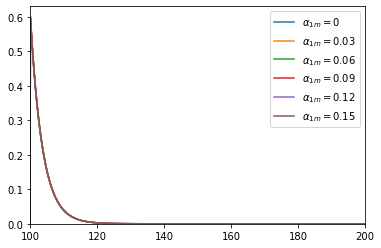

In [51]:
for i in range(6):
    alpha1M = alpha1m_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,ImsP)

plt.legend([r'$\alpha_{1m}=0$',r'$\alpha_{1m}=0.03$',r'$\alpha_{1m}=0.06$',r'$\alpha_{1m}=0.09$',r'$\alpha_{1m}=0.12$',r'$\alpha_{1m}=0.15$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()

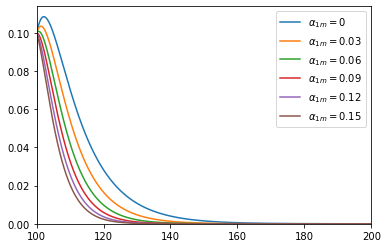

In [52]:
for i in range(6):
    alpha1M = alpha1m_values[i]
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]
    
    x0 = [0.6,0.1]
    Seq = Ss[999]
    I1eq = I1s[999]
    xs = odeint(mutant,x0,ts1)
    Ims = xs[:,0]
    D1ms = xs[:,1]
    
    ImsP = np.zeros(2000)
    D1msP = np.zeros(2000)
    for i in range (1000,2000):
        ImsP[i] = Ims[i-1000]
        D1msP[i] = D1ms[i-1000]
   
    plt.plot(ts2,D1msP)

plt.legend([r'$\alpha_{1m}=0$',r'$\alpha_{1m}=0.03$',r'$\alpha_{1m}=0.06$',r'$\alpha_{1m}=0.09$',r'$\alpha_{1m}=0.12$',r'$\alpha_{1m}=0.15$'],  loc='upper right')
plt.xlim(100,200)
plt.ylim(0)
plt.show()